In [7]:
#################################################################################################

class atom(object): # nuovo stile di classe python subclass di object 
    def __init__(self, at, x, y, z):
        self.__symbol = at
        self.__coordinate = (x, y, z)
        self.__charge = 0
    
    def set_symbol(self, at): 
        self.__symbol = at
    
    def get_symbol(self):
        return self.__symbol

    def set_charge(self, val): 
        self.__charge = val
    
    def get_charge(self):
        return self.__charge
 
    def set_coordinates(self, x, y, z):
        self.__coordinate = (x, y, z)
 
    def get_coordinates(self):
        return self.__coordinate
 
    def get_str(self):
        return '%3s %10.4f %10.4f %10.4f' % (self.__symbol, self.__coordinate[0], \
          self.__coordinate[1], self.__coordinate[2])
 
    def __repr__(self): # overloads printing
        return self.get_str()

#################################################################################################

class molecule(object):
    def __init__ (self, nome = "noname"):
        self.__name = nome
        self.__list_atoms = []
 
    def add_atom (self, atom):
        self.__list_atoms.append(atom)
 
    def get_atoms (self):
        return self.__list_atoms

    def get_num_of_atoms(self):
        return len(self.__list_atoms)
 
    def __repr__ (self):
        str = 'Molecule %s\n' % self.__name
        str = str + 'has %d atoms\n' % len(self.__list_atoms)
      
        for atom in self.__list_atoms:
            str = str + atom.get_str() + '\n'
 
        return str

#################################################################################################

mol = molecule()

with open("CAAuCA.xyz") as fp:
    dim = int(fp.readline())
    header  = fp.readline()
    for i in range(dim):
        l = fp.readline()
        sl = l.split()

        if len(sl) != 4 and len(sl) != 5:
            print("Error at line "+ l)
            exit(1)

        a = atom (sl[0], float(sl[1]), \
            float(sl[2]), float(sl[3]))

        if len(sl) == 5:
            a.set_charge(int(sl[4])) 

        mol.add_atom(a)
        
print(mol)

Molecule noname
has 31 atoms
  N    -1.0128    -0.0000    -2.9396
  C    -0.5925    -0.0011    -4.2543
  C     0.7599     0.0013    -4.2288
  N     1.1301     0.0002    -2.8989
  H    -1.2875    -0.0039    -5.0803
  H     1.4857     0.0042    -5.0277
  N     0.0550     1.0664     2.8410
  C    -0.0077     0.6728     4.1626
  C    -0.1428    -0.6732     4.1600
  N    -0.1553    -1.0666     2.8369
  H     0.0493     1.3795     4.9765
  H    -0.2307    -1.3800     4.9710
  C    -2.4139    -0.0288    -2.5412
  H    -2.9564     0.7652    -3.0572
  H    -2.8542    -0.9963    -2.7907
  H    -2.4755     0.1321    -1.4648
  C     2.5150     0.0288    -2.4478
  H     2.9646     0.9963    -2.6802
  H     2.5359    -0.1322    -1.3699
  H     3.0767    -0.7651    -2.9430
  C     0.2283     2.4501     2.4195
  H    -0.5173     3.0774     2.9109
  H     1.2299     2.7982     2.6800
  H     0.0931     2.5070     1.3394
  C    -0.3125    -2.4502     2.4089
  H    -1.3234    -2.7981     2.6303
  H    -0

In [8]:
#translate -0.0043     0.0000    +0.0402

xt = -0.0043 
yt =  0.0000
zt = +0.0402
molt = molecule()

for a in mol.get_atoms():
    coords = a.get_coordinates()
    at = atom (a.get_symbol(), coords[0] + xt, coords[1] + yt, \
            coords[2] + zt)

    at.set_charge(a.get_charge())
    molt.add_atom(at)

print(molt)
    

Molecule noname
has 31 atoms
  N    -1.0171     0.0000    -2.8994
  C    -0.5968    -0.0011    -4.2141
  C     0.7556     0.0013    -4.1886
  N     1.1258     0.0002    -2.8587
  H    -1.2918    -0.0039    -5.0401
  H     1.4814     0.0042    -4.9875
  N     0.0507     1.0664     2.8812
  C    -0.0120     0.6728     4.2028
  C    -0.1471    -0.6732     4.2002
  N    -0.1596    -1.0666     2.8771
  H     0.0450     1.3795     5.0167
  H    -0.2350    -1.3800     5.0112
  C    -2.4182    -0.0288    -2.5010
  H    -2.9607     0.7652    -3.0170
  H    -2.8585    -0.9963    -2.7505
  H    -2.4798     0.1321    -1.4246
  C     2.5107     0.0288    -2.4076
  H     2.9603     0.9963    -2.6400
  H     2.5316    -0.1322    -1.3297
  H     3.0724    -0.7651    -2.9028
  C     0.2240     2.4501     2.4597
  H    -0.5216     3.0774     2.9511
  H     1.2256     2.7982     2.7202
  H     0.0888     2.5070     1.3796
  C    -0.3168    -2.4502     2.4491
  H    -1.3277    -2.7981     2.6705
  H    -0

Direction Cosines

    α is the angle between u and the x-axis (in dark red),
    β is the angle between u and the y-axis (in green) and
    γ is the angle between u and the z-axis (in pink),

then we can use the scalar product and write:

    u1
    	

    = u • i

    = 1 × 1 × cos α

    = cos α

    u2
    	

    = u• j

    = 1 × 1 × cos β

    = cos β

    u3
    	

    = u • k

    = 1 × 1 × cos γ

    = cos γ
    
   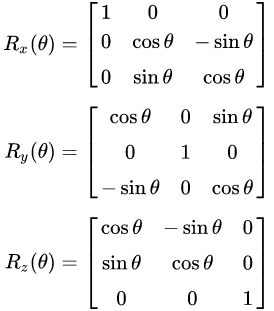
   

In [17]:
import math

def dot_product (x1, y1, z1, x2, y2, z2):
    
    dp = x1*x2 + y1*y2 + z1*z2
    
    return dp

def norm (x1, y1, z1):
    
    dp = x1*x1 + y1*y1 + z1*z1
    
    return math.sqrt(dp)
    

dp = dot_product (0.0388, 0.0000, -2.0580, 1.0, 0.0, 0.0)
np = norm(0.0388, 0.0000, -2.0580)

#print(dp/np)

alpha = math.acos(dp/np)
print(alpha)

0.018849905830876767
1.5519453044973708


In [24]:
RY = [[ 1.0,             0.0,              0.0], 
      [ 0.0, math.cos(alpha), -math.sin(alpha)],
      [ 0.0, math.sin(alpha),  math.cos(alpha)]]

RY = [[ math.cos(alpha), 0.0,  math.sin(alpha)], 
      [             0.0, 1.0,              0.0],
      [-math.sin(alpha), 0.0,  math.cos(alpha)]]

RZ = [[ math.cos(alpha), -math.sin(alpha), 0.0], 
      [ math.sin(alpha),  math.cos(alpha), 0.0],
      [             0.0,              0.0, 1.0]]

In [26]:
molr = molecule()

for a in molt.get_atoms():
    coords = a.get_coordinates()
    newcoords = [0.0, 0.0, 0.0]
    
    for i in range(3):
        for j in range(3):
            newcoords[i] += RY[i][j] * coords[j]
            
    at = atom (a.get_symbol(), newcoords[0], newcoords[1], \
            newcoords[2])

    at.set_charge(a.get_charge())
    molr.add_atom(at)

print(molr)

Molecule noname
has 31 atoms
  N    -2.9181     0.0000     0.9623
  C    -4.2246    -0.0011     0.5173
  C    -4.1736     0.0013    -0.8344
  N    -2.8370     0.0002    -1.1795
  H    -5.0636    -0.0039     1.1966
  H    -4.9587     0.0042    -1.5752
  N     2.8816     1.0664     0.0036
  C     4.2018     0.6728     0.0912
  C     4.1967    -0.6732     0.2262
  N     2.8736    -1.0666     0.2138
  H     5.0167     1.3795     0.0496
  H     5.0059    -1.3800     0.3294
  C    -2.5461    -0.0288     2.3706
  H    -3.0723     0.7652     2.9033
  H    -2.8039    -0.9963     2.8061
  H    -1.4711     0.1321     2.4525
  C    -2.3598     0.0288    -2.5556
  H    -2.5837     0.9963    -3.0095
  H    -1.2817    -0.1322    -2.5562
  H    -2.8444    -0.7651    -3.1266
  C     2.4635     2.4501    -0.1776
  H     2.9407     3.0774     0.5771
  H     2.7428     2.7982    -1.1741
  H     1.3810     2.5070    -0.0628
  C     2.4427    -2.4502     0.3629
  H     2.6450    -2.7981     1.3778
  H     1